In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats.stats import pearsonr 
import os
from pathlib import Path
import math
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import statsmodels


In [2]:
# getting location of the file
# os.getcwd()
#open the files in this location
os.listdir(os.getcwd())


['.ipynb_checkpoints',
 'cancerous_modified.txt',
 'healthy_modified.txt',
 'lusc-rsem-fpkm-tcga-t_paired.txt',
 'lusc-rsem-fpkm-tcga_paired.txt',
 'Untitled.ipynb',
 'vol2.ipynb',
 'vol3.ipynb',
 'vol4.ipynb',
 'vol5.ipynb',
 'vol6.ipynb',
 'vol7.ipynb']

### uploading files in pandas file


In [3]:
#upload txt files in python
fileh =pd.read_csv('lusc-rsem-fpkm-tcga_paired.txt', sep="\t", header=0) #adding healthy file to fileh
print(fileh)
print("---------------------------------------------------------------------------------")
filec = pd.read_csv('lusc-rsem-fpkm-tcga-t_paired.txt', sep="\t", header=0) #adding cancerous file to filec
print(filec)

         Hugo_Symbol  Entrez_Gene_Id  TCGA-43-7657  TCGA-58-8386  \
0           HIST3H2A           92815         62.12        130.60   
1              LIN7B           64130        185.11        283.05   
2                LXN           56925        909.17        819.30   
3             CNKSR2           22866         41.81         18.29   
4              SCML1            6322        133.36        214.27   
...              ...             ...           ...           ...   
19643         HAVCR2           84868        423.61        529.06   
19644    RP1-66C13.4               0          0.00          0.00   
19645        C3orf79          152118          0.00          0.00   
19646  CTD-2116N17.1               0          0.00          0.00   
19647           FUT2            2524         64.34        101.54   

       TCGA-22-5478  TCGA-22-5472  TCGA-43-5670  TCGA-60-2709  TCGA-22-5489  \
0             33.06         35.50         73.03         60.39         92.05   
1            119.26      

### filtering the files from rows that has more that 25 zeros on their columns


In [4]:
mod_file_h=fileh
mod_file_c=filec
row_Count=0
# counting zeros in each row
zero_per_rowh = np.array(fileh.apply( lambda s : s.value_counts().get(key=0,default=0), axis=1))
zero_per_rowc = np.array(filec.apply( lambda s : s.value_counts().get(key=0,default=0), axis=1))
# droing the rows that have more than 25 0 in both healthy and cancerous files
for i in np.arange(len(zero_per_rowh)):
    if ((zero_per_rowh[i] > 25) | (zero_per_rowc[i] > 25)):
        row_Count=row_Count+1
        mod_file_h = mod_file_h.drop(i) 
        mod_file_c = mod_file_c.drop(i)
        
print(mod_file_h)
print(mod_file_c)
print("there are",row_Count,"rows affected")

        

         Hugo_Symbol  Entrez_Gene_Id  TCGA-43-7657  TCGA-58-8386  \
0           HIST3H2A           92815         62.12        130.60   
1              LIN7B           64130        185.11        283.05   
2                LXN           56925        909.17        819.30   
3             CNKSR2           22866         41.81         18.29   
4              SCML1            6322        133.36        214.27   
...              ...             ...           ...           ...   
19641         ZNF521           25925        215.77        148.09   
19642         SPINT2           10653       6792.79       5441.30   
19643         HAVCR2           84868        423.61        529.06   
19646  CTD-2116N17.1               0          0.00          0.00   
19647           FUT2            2524         64.34        101.54   

       TCGA-22-5478  TCGA-22-5472  TCGA-43-5670  TCGA-60-2709  TCGA-22-5489  \
0             33.06         35.50         73.03         60.39         92.05   
1            119.26      

### downloading the modified files to txt files 

In [5]:
mod_file_h.to_csv('healthy_modified.txt', index= False,sep="\t")
mod_file_c.to_csv('cancerous_modified.txt', index= False,sep="\t")
# the file in the folder are
os.listdir(os.getcwd())


['.ipynb_checkpoints',
 'cancerous_modified.txt',
 'healthy_modified.txt',
 'lusc-rsem-fpkm-tcga-t_paired.txt',
 'lusc-rsem-fpkm-tcga_paired.txt',
 'Untitled.ipynb',
 'vol2.ipynb',
 'vol3.ipynb',
 'vol4.ipynb',
 'vol5.ipynb',
 'vol6.ipynb',
 'vol7.ipynb']

### changing pandas to numpy array 

In [6]:
healthy_pd_mod=pd.read_csv("healthy_modified.txt",sep="\t", header=0)
healthy_pd_mod=pd.DataFrame(healthy_pd_mod)
cancerous_pd_mod=pd.read_csv("cancerous_modified.txt",sep="\t", header=0)
cancerous_pd_mod=pd.DataFrame(cancerous_pd_mod)
#---------------------------------------------------------------#
arr_h= healthy_pd_mod.to_numpy()
arr_c=cancerous_pd_mod.to_numpy()

print("healthy",arr_h)
print(" *************************** ")
print("cancerus",arr_c)
# to remove gene name and id from a row
# x=arr_h[i][2:]
# y=arr_c[i][2:]

healthy [['HIST3H2A' 92815 62.12 ... 37.32 43.63 77.25]
 ['LIN7B' 64130 185.11 ... 105.15 185.11 356.05]
 ['LXN' 56925 909.17 ... 764.36 518.15 878.17]
 ...
 ['HAVCR2' 84868 423.61 ... 1030.12 665.29 633.73]
 ['CTD-2116N17.1' 0 0.0 ... 1.77 3.63 2.56]
 ['FUT2' 2524 64.34 ... 16.27 73.54 88.26]]
 *************************** 
cancerus [['HIST3H2A' 92815 336.79 ... 228.13 251.48 23.59]
 ['LIN7B' 64130 105.15 ... 96.68 277.2 153.34]
 ['LXN' 56925 848.22 ... 507.46 255.0 346.29]
 ...
 ['HAVCR2' 84868 74.58 ... 73.54 55.89 480.04]
 ['CTD-2116N17.1' 0 6.89 ... 15.8 31.0 4.86]
 ['FUT2' 2524 105.15 ... 53.57 332.14 69.52]]


### getting correlation between healthy and cancerous genes

In [7]:
a=np.array([(0,0)])
for i in np.arange(len(arr_h)) :
    x= arr_h[i][2:]
    y= arr_c[i][2:]
    d=scipy.stats.pearsonr(x,y)
    b=np.array([d])
    a= np.concatenate((a, b))
corr=np.array(a[1:])

# print(len(corr))
# for x in np.arange(len(corr)):
#     print(corr[x])
#     print("****************************")


### maximum and minimum correlation


In [8]:
maxi = np.amax(corr,axis=0)
print('maxi=',maxi[0])
print('**********************************')
mini = np.amin(corr,axis=0)
print('mini=',mini[0])


maxi= 0.9690441442970706
**********************************
mini= -0.4528072785247083


### plotting for genes that have max and min correlation

max index= 10821
gene name is: AREGB


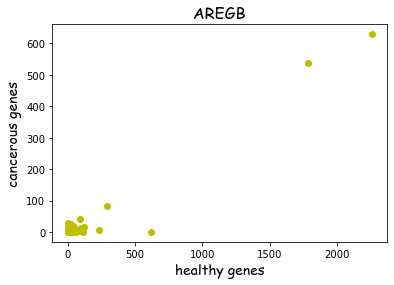

correlation coefficient is 0.9690441442970706
**********************************
min index= 12965
gene name is: FAM222B


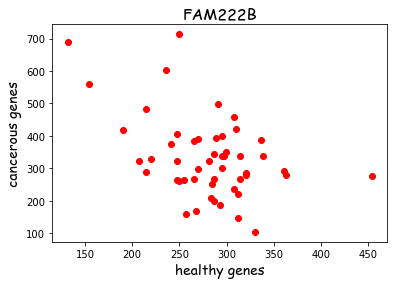

correlation coefficient is -0.4528072785247083
**********************************


In [9]:
sort_arr_p=[(0,0,0)]
sort_arr_n=[(0,0,0)]

for i in np.arange(len(corr)): 
    corr_r=corr[i][0]
    x= arr_h[i][2:]
    y= arr_c[i][2:]
    if corr[i][0] > 0:
        a=[(arr_h[i][0],arr_h[i][1],format(corr[i][0], '.5f'))]
        sort_arr_p= np.concatenate((sort_arr_p, a))
    else:
        b=[(arr_h[i][0],arr_h[i][1],format(corr[i][0], '.5f'))]
        sort_arr_n= np.concatenate((sort_arr_n, b))

    
    if corr_r==maxi[0]:
        print('max index=',i)
        print('gene name is:',arr_h[i][0])
        plt.plot(x,y,'o',color='y')
        plt.xlabel('healthy genes',fontdict={'fontname':'Comic Sans MS', 'fontsize':14})
        plt.ylabel('cancerous genes',fontdict={'fontname':'Comic Sans MS', 'fontsize':14})
        plt.title(arr_h[i][0],fontdict={'fontname':'Comic Sans MS', 'fontsize':16})
        plt.show()
        print('correlation coefficient is',corr[i][0])
        print('**********************************')

    elif corr_r==mini[0]:
        print('min index=',i)
        print('gene name is:',arr_h[i][0])
        plt.plot(x,y,'o',color='r')
        plt.xlabel('healthy genes',fontdict={'fontname':'Comic Sans MS', 'fontsize':14})
        plt.ylabel('cancerous genes',fontdict={'fontname':'Comic Sans MS', 'fontsize':14})
        plt.title(arr_h[i][0],fontdict={'fontname':'Comic Sans MS', 'fontsize':16})
        plt.show()
        print('correlation coefficient is',corr[i][0])
        print('**********************************')



In [10]:
cc_table_P=sort_arr_p[1:]
cc_table_P = pd.DataFrame(cc_table_P, columns =['gene name', 'gene id', 'correlation coef'])
cc_table_P.sort_values("correlation coef", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
print(cc_table_P)
cc_table_n=sort_arr_n[1:]
cc_table_n = pd.DataFrame(cc_table_n, columns =['gene name', 'gene id', 'correlation coef'])
cc_table_n.sort_values("correlation coef", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
print(cc_table_n)


      gene name    gene id correlation coef
7185      AREGB        374          0.96904
3593      OR7D2     162998          0.93057
8907     GUCA1A       2978          0.87803
4393   MTRNR2L2  100462981          0.84758
11274    NUTM2E          0          0.82695
...         ...        ...              ...
355       RPS17       6218          0.00010
10616    CC2D1B     200014          0.00010
8900     DUSP13      51207          0.00006
7730      STRBP      55342          0.00001
3924      PLA1A      51365          0.00001

[11509 rows x 3 columns]
       gene name gene id correlation coef
4344     FAM222B   55731         -0.45281
4559       PTPRJ    5795         -0.42434
3823     ZFYVE20   64145         -0.41862
4151       VPRBP    9730         -0.41621
1266      S100A6    6277         -0.40297
...          ...     ...              ...
4080      ELOVL2   54898         -0.00017
1804  AL021546.6       0         -0.00015
3708     TMEM50A   23585         -0.00012
4333       APPL2   55198  

### Hypothesis
##### Paired genes 

#### t-test for paired genes

In [11]:
a=np.array([(0)])
for i in np.arange(len(arr_h)): 
    p_val = ttest_rel( arr_h[i][2:],arr_c[i][2:] ).pvalue
    b=np.array([p_val])
    a= np.concatenate((a, b))
p_val_paired=np.array(a[1:])
print("p-value = ")
print (p_val_paired)


p-value = 
[4.04360665e-08 2.89164597e-01 2.32236730e-04 ... 2.43512506e-13
 4.12949601e-11 1.16671888e-06]


### FDR correction for paired genes

In [12]:
b=[(0,0,0)]
pp_val = p_val_paired.tolist()
corrected_p_val_paired = multipletests(pp_val, alpha=0.05, method='fdr_bh')[1]
for i in np.arange(len(arr_h)):
    a=[(arr_h[i][0],p_val_paired[i],corrected_p_val_paired[i])]
    b= np.concatenate((b, a))
table_P=b[1:]
table_P = pd.DataFrame(table_P, columns =['gene', 'pp-values', 'pp-values_fdr'])
table_P

,gene,pp-values,pp-values_fdr
0,HIST3H2A,4.0436066512253253e-08,1.4526130798077958e-07
1,LIN7B,0.2891645967596114,0.336155783914186
2,LXN,0.0002322367302316609,0.000458701959415613
3,CNKSR2,3.420577429814986e-12,2.453018400205896e-11
4,SCML1,0.06251345969931547,0.08359251391142548
...,...,...,...
17321,ZNF521,4.142164042884379e-06,1.0839319469417724e-05
17322,SPINT2,2.4526187810003406e-07,7.777099743706424e-07
17323,HAVCR2,2.435125057787389e-13,2.1658612295289683e-12
17324,CTD-2116N17.1,4.129496011651744e-11,2.425343996538241e-10


#### comparing paired value and FDR paired value with alpha

In [15]:
table_P['pp_significant'] = table_P['pp-values'].apply(lambda x: float(x) < 0.05)
table_P['pp_significant_fdr'] = table_P['pp-values_fdr'].apply(lambda x: float(x) < 0.05)
table_P

,gene,pp-values,pp-values_fdr,pp_significant,pp_significant_fdr
0,HIST3H2A,4.0436066512253253e-08,1.4526130798077958e-07,True,True
1,LIN7B,0.2891645967596114,0.336155783914186,False,False
2,LXN,0.0002322367302316609,0.000458701959415613,True,True
3,CNKSR2,3.420577429814986e-12,2.453018400205896e-11,True,True
4,SCML1,0.06251345969931547,0.08359251391142548,False,False
...,...,...,...,...,...
17321,ZNF521,4.142164042884379e-06,1.0839319469417724e-05,True,True
17322,SPINT2,2.4526187810003406e-07,7.777099743706424e-07,True,True
17323,HAVCR2,2.435125057787389e-13,2.1658612295289683e-12,True,True
17324,CTD-2116N17.1,4.129496011651744e-11,2.425343996538241e-10,True,True


#### paired values after fdr less than alpha

In [17]:
diffpairedgenes = table_P[(table_P['pp_significant_fdr']== True) & (table_P['pp_significant']== True)]
diffpairedgenes
# diffrentially_paired_genes = significance_paired_genes[significance_paired_genes['pp_significant_fdr']== True]
# diffrentially_paired_genes

,gene,pp-values,pp-values_fdr,pp_significant,pp_significant_fdr
0,HIST3H2A,4.0436066512253253e-08,1.4526130798077958e-07,True,True
2,LXN,0.0002322367302316609,0.000458701959415613,True,True
3,CNKSR2,3.420577429814986e-12,2.453018400205896e-11,True,True
6,GSDMD,3.041721155197623e-06,8.132848878850928e-06,True,True
7,AKR1C1,1.9385746866608284e-05,4.5548881232825486e-05,True,True
...,...,...,...,...,...
17321,ZNF521,4.142164042884379e-06,1.0839319469417724e-05,True,True
17322,SPINT2,2.4526187810003406e-07,7.777099743706424e-07,True,True
17323,HAVCR2,2.435125057787389e-13,2.1658612295289683e-12,True,True
17324,CTD-2116N17.1,4.129496011651744e-11,2.425343996538241e-10,True,True


#### names of paired genes after fdr 

In [57]:
print(diffpairedgenes['gene'][0:])

0             HIST3H2A
2                  LXN
3               CNKSR2
6                GSDMD
7               AKR1C1
             ...      
17321           ZNF521
17322           SPINT2
17323           HAVCR2
17324    CTD-2116N17.1
17325             FUT2
Name: gene, Length: 12406, dtype: object


#### Independant genes

#### t-test for independant genes

In [19]:
a=np.array([(0)])
for i in np.arange(len(arr_h)): 
    p_val = ttest_ind( arr_h[i][2:],arr_c[i][2:] ).pvalue
    b=np.array([p_val])
    a= np.concatenate((a, b))
p_val_ind=np.array(a[1:])
print("p-value = ")
print (p_val_ind)

p-value = 
[3.60714011e-09 3.13829483e-01 8.16404364e-05 ... 1.22818591e-14
 1.06828347e-12 2.13366600e-07]


### FDR correction for independant genes

In [20]:
b=[(0,0,0)]
corrected_p_val_ind = multipletests(p_val_ind, alpha=0.05, method='fdr_bh')[1]
corrected_p_val_ind=corrected_p_val_ind.tolist()
for i in np.arange(len(arr_h)):
    a=[(arr_h[i][0],p_val_ind[i],corrected_p_val_ind[i])]
    b= np.concatenate((b, a))
table_ind=b[1:]
table_ind = pd.DataFrame(table_ind, columns =['gene', 'indp-values', 'indp-values_fdr'])
table_ind
# print (corrected_p_val_ind)

,gene,indp-values,indp-values_fdr
0,HIST3H2A,3.6071401066563956e-09,1.3771994157763047e-08
1,LIN7B,0.313829482510041,0.3634875067831386
2,LXN,8.164043644485789e-05,0.00017208055983498877
3,CNKSR2,6.3746517799747675e-15,5.031763860585094e-14
4,SCML1,0.04726589843891226,0.06506148854791403
...,...,...,...
17321,ZNF521,2.2734930700174226e-06,5.987314323015939e-06
17322,SPINT2,5.250215300402669e-08,1.7195695707897286e-07
17323,HAVCR2,1.2281859138549907e-14,9.333135589233144e-14
17324,CTD-2116N17.1,1.068283469421908e-12,6.2956052351033946e-12


#### comparing independant value and FDR paired value with alpha

In [24]:
table_ind['indp_significant'] = table_ind['indp-values'].apply(lambda x: float(x) < 0.05)
table_ind['indp_significant_fdr'] = table_ind['indp-values_fdr'].apply(lambda x: float(x) < 0.05)
table_ind

,gene,indp-values,indp-values_fdr,indp_significant,indp_significant_fdr
0,HIST3H2A,3.6071401066563956e-09,1.3771994157763047e-08,True,True
1,LIN7B,0.313829482510041,0.3634875067831386,False,False
2,LXN,8.164043644485789e-05,0.00017208055983498877,True,True
3,CNKSR2,6.3746517799747675e-15,5.031763860585094e-14,True,True
4,SCML1,0.04726589843891226,0.06506148854791403,True,False
...,...,...,...,...,...
17321,ZNF521,2.2734930700174226e-06,5.987314323015939e-06,True,True
17322,SPINT2,5.250215300402669e-08,1.7195695707897286e-07,True,True
17323,HAVCR2,1.2281859138549907e-14,9.333135589233144e-14,True,True
17324,CTD-2116N17.1,1.068283469421908e-12,6.2956052351033946e-12,True,True


#### independant values after fdr less than alpha

In [29]:
diffindgenes  = table_ind[(table_ind['indp_significant_fdr']== True) & (table_ind['indp_significant']== True)]
diffindgenes 
#another way to solve
# diffrentially_ind_genes = significance_ind_genes[significance_ind_genes['indp_significant_fdr']== True]
# diffrentially_ind_genes

,gene,indp-values,indp-values_fdr,indp_significant,indp_significant_fdr
0,HIST3H2A,3.6071401066563956e-09,1.3771994157763047e-08,True,True
2,LXN,8.164043644485789e-05,0.00017208055983498877,True,True
3,CNKSR2,6.3746517799747675e-15,5.031763860585094e-14,True,True
6,GSDMD,5.3442886577203215e-06,1.3365350069812685e-05,True,True
7,AKR1C1,7.857877107856742e-06,1.9207897682100157e-05,True,True
...,...,...,...,...,...
17321,ZNF521,2.2734930700174226e-06,5.987314323015939e-06,True,True
17322,SPINT2,5.250215300402669e-08,1.7195695707897286e-07,True,True
17323,HAVCR2,1.2281859138549907e-14,9.333135589233144e-14,True,True
17324,CTD-2116N17.1,1.068283469421908e-12,6.2956052351033946e-12,True,True


#### names of independant genes after fdr 

In [74]:
print(diffindgenes['gene'][0:])

0             HIST3H2A
2                  LXN
3               CNKSR2
6                GSDMD
7               AKR1C1
             ...      
17321           ZNF521
17322           SPINT2
17323           HAVCR2
17324    CTD-2116N17.1
17325             FUT2
Name: gene, Length: 12316, dtype: object


### Names of common and distinct genes in paired and independant samples aftr FDR

In [77]:
common_genes=np.array (['common'])
paired_distinct_genes= np.array (['distinct'])
ind_distinct_genes= np.array(['inddist'])
for i in range (len(arr_h)) :
    if ((i in diffpairedgenes.index) & (i in diffindgenes.index)):
        common= np.array ([diffpairedgenes['gene'][i]])
        common_genes= np.concatenate((common_genes,common))
    elif ((i in diffpairedgenes.index) & (i not in diffindgenes.index)):
        distinct= np.array([diffpairedgenes['gene'][i]])
        paired_distinct_genes= np.concatenate((paired_distinct_genes,distinct))
    elif ((i not in diffpairedgenes.index) & (i in diffindgenes.index)):
        ind_distinct= np.array([diffindgenes['gene'][i]])
        ind_distinct_genes= np.concatenate((ind_distinct_genes,ind_distinct))
common_genes = common_genes[1:]
paired_distinct_genes = paired_distinct_genes[1:]
ind_distinct_genes = ind_distinct_genes[1:]
print('common genes are')
print(common_genes)
print('*********************************************************')
print ('paired distinct genes are')
print (paired_distinct_genes)
print('*********************************************************')
print('independant distinct genes are')
print (ind_distinct_genes)

common genes are
['HIST3H2A' 'LXN' 'CNKSR2' ... 'HAVCR2' 'CTD-2116N17.1' 'FUT2']
*********************************************************
paired distinct genes are
['RDH14' 'ZNF354A' 'PLAC8L1' 'MTPN' 'LAMTOR3' 'DOHH' 'ELP5' 'GAA' 'GPT'
 'UBR3' 'MED22' 'WDR54' 'CCL7' 'AP3S2' 'SEC16B' 'VTI1A' 'CXXC1' 'HIVEP1'
 'AC021860.1' 'EIF3C' 'THAP5' 'IFI44L' 'AC010441.1' 'FZD8' 'SLC38A6'
 'C15orf38-AP3S2' 'C12orf71' 'MAP3K2' 'MORN2' 'EDEM3' 'MTRNR2L8' 'FAM27E2'
 'SPDYE2' 'NBPF14' 'SLC25A19' 'OAS2' 'ASB7' 'NPIPB4' 'ANAPC2' 'AGBL2'
 'NPIPB15' 'ZNF112' 'TMC6' 'TBK1' 'UTY' 'TRIM14' 'NADSYN1' 'GPR42' 'TYMP'
 'DCTN2' 'RP13-996F3.5' 'CAPN10' 'AL591684.1' 'AC093157.1' 'FAF2' 'ZNF823'
 'HSD11B1L' 'THYN1' 'CENPBD1' 'ZC3H10' 'HIVEP2' 'RMND1' 'SPAG17' 'B3GALT1'
 'ARL3' 'ANKRD36' 'ZNF205' 'OPRL1' 'ACIN1' 'GNG12' 'TGFB1' 'UBXN6' 'SOCS5'
 'ZNF321P' 'CTAGE8' 'ANO9' 'DHRS4-AS1' 'PLS3' 'NBPF3' 'WASH4P' 'PLGLB2'
 'MFSD12' 'MIS18BP1' 'EHBP1L1' 'REST' 'NFKBIL1' 'BIVM' 'C9orf117' 'AGL'
 'ALDH1L1' 'ELMOD2' 'SPATA20' 'KL